# Inference: Classical and Bayesian

G. Richards 2016 (with material from Ivezic [Sections 4.0, 4.1, 4.2.1-6, 4.3, 5.0, 5.1, 5.2.1, 5.6.1, 5.6.5], Bevington, and Leighly).

Statistical *inference* is about drawing conclusions from data, specifically determining the properties of a population by data sampling.  

Three examples of inference are:
* What is the best estimate for a model parameter
* How confident we are about our result
* Are the data consistent with a particular model/hypothesis

### Some Terminology

* We typically study the properties of some ***population*** by measuring ***samples*** from that population. 
* A ***statistic*** is any function of the sample. For example, the sample mean is a statistic. But also, "the value of the first measurement" is also a statistic.
* To conclude something about the population from the sample, we develop ***estimators***. An estimator is a statistic based on observed data.
* There are ***point*** and ***interval estimators***. Point estimators yield single-valued results (example: the position of an object), while with an interval estimator, the result would be a range of plausible values (example: confidence interval for the position of an object).

### Bayesian vs Frequentist 

This is the point where we are supposed to have a long discussion about the various pros and cons of the two most common ways of approaching inference problems:
* Classical (frequentist) and
* Bayesian.

Personally I don't see the need for a lengthy discussion on this.  In short, classical (frequentist) statistics is concerned with the frequency with which $A$  happens in identical repeats of an experiment, i.e., $p(A)$. Bayesian statistics is concerned instead with $p(A|B)$, which is how plausible it is for $A$ to happen given the knowledge that $B$ has happened (or is true). 

For more insight see [Jake VanderPlas's blog "Frequentism and Bayesianism: A Practical Introduction](http://jakevdp.github.io/blog/2014/03/11/frequentism-and-bayesianism-a-practical-intro/).

My colleague, Karen Leighly, dug up the following article, which might help one to understand the differences in these approaches in a relatively simply way.  The first 4 sections are what is relevant here.
[Efron 1978](http://www.jstor.org/stable/2321163?seq=1#page_scan_tab_contents)

I'll briefly (and perhaps too cavalierly) summarize it.

Let's say that you get the results of an IQ test.  Any given test result might not give you your "real" IQ.  But it gives us a way to *estimate* it (and the possible range of values).  

For a frequentist, the best estimator is just the average of many test results.  So, if you took 5 IQ tests and got a 160, then that would be the estimator of your true IQ.

On the other hand, a Bayesian would say: "but wait, I know that IQ tests are normed to 100 with a standard deviation of 15 points".  So they will use that as "prior" information, which is important here since 160 is a 4$\sigma$ outlier. 

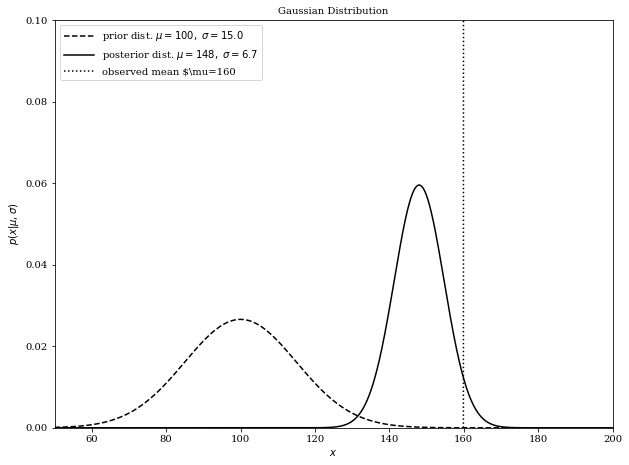

In [2]:
# Execute this cell
%matplotlib inline
import numpy as np
from scipy.stats import norm
from matplotlib import pyplot as plt

from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=10, usetex=False) # changed from true

#------------------------------------------------------------
# Define the distributions to be plotted
sigma_values = [15, 6.7, 1]
linestyles = ['--', '-', ':']
mu_values = [100, 148, 160]
labeltext = ['prior dist.', 'posterior dist.', 'observed mean']
x = np.linspace(50, 200, 1000)

#------------------------------------------------------------
# plot the distributions
fig, ax = plt.subplots(figsize=(10, 7.5))

for sigma, ls, mu, lab in zip(sigma_values, linestyles, mu_values, labeltext):
    # create a gaussian / normal distribution
    dist = norm(mu, sigma)

    if (sigma>1):
        plt.plot(x, dist.pdf(x), ls=ls, c='black',label=r'%s $\mu=%i,\ \sigma=%.1f$' % (lab, mu, sigma))
    else:
        plt.plot([159.9,160.1],[0,0.8], ls=ls, color='k', label=r'%s $\mu=%i' % (lab, mu))
        
plt.xlim(50, 200)
plt.ylim(0, 0.1)
plt.xlabel('$x$')
plt.ylabel(r'$p(x|\mu,\sigma)$')
plt.title('Gaussian Distribution')
plt.legend()

The end result (skipping over the detailed math) is that the Bayesian estimate of the IQ is not 160, but rather 148, or more specifically that $p(141.3\le \mu \le 154.7 \, | \, \overline{x}=160) = 0.683$.

That's actually fine, where the controvery comes in is when the Bayesian wants to do the same things but doesn't actually know the prior distribution, or when the parameter is fixed but we are trying to experimentally verify it (e.g., the speed of light).

## Maximum Likelihood Estimation (MLE)

Let's not worry about classical vs. Bayesian right now and talk about maximum likelihood estimation (Ivezic, 4.2), which is relevant to both.

If we know the distribution from which our data were drawn, then we can compute the **probability** or **likelihood** of our data.  

For example if you know that your data are drawn from a model with a Gaussian distribution, then we've already seen that the probablity of getting a specific value of $x$ is given by
$$p(x|\mu,\sigma) = \frac{1}{\sigma\sqrt{2\pi}} \exp\left(\frac{-(x-\mu)^2}{2\sigma^2}\right).$$

If we want to know the total likelihood of our *entire* data set (as opposed to one measurement) then we must compute the *product* of all the individual probabilities:
$$L \equiv p(\{x_i\}|M(\theta)) = \prod_{i=1}^n p(x_i|M(\theta)),$$
where $M$ refers to the *model* and $\theta$ refers collectively to the $k$ parameters of the model, which can be multi-dimensional.

In words, this is *the probability of the data given the model*.  However, note that while the components of $L$ may be normalized pdfs, their product is not.  Also the product can be very small, so we often take the log of $L$.

We can write this out as
$$L = \prod_{i=1}^n \frac{1}{\sigma\sqrt{2\pi}} \exp\left(\frac{-(x_i-\mu)^2}{2\sigma^2}\right),$$
and simplify to
$$L = \prod_{i=1}^n \left( \frac{1}{\sigma\sqrt{2\pi}} \right) \exp\left( -\frac{1}{2} \sum \left[\frac{-(x_i-\mu)}{\sigma} \right]^2 \right),$$

where we have written the product of the exponentials as the exponential of the sum of the arguments, which will make things easier to deal with later.

That is, we have done this: $$\prod_{i=1}^n A_i \exp(-B_i) = (A_iA_{i+1}\ldots A_n) \exp[-(B_i+B_{i+1}+\ldots+B_n)]$$

If you have done $\chi^2$ analysis (e.g.,, doing a linear least-squares fit), then you might notice that the argument of the exponential is just 
$$\exp \left(-\frac{\chi^2}{2}\right).$$

That is, for our gaussian distribution
$$\chi^2 = \sum_{i=1}^n \left ( \frac{x_i-\mu}{\sigma}\right)^2.$$

So, maximizing the likelihood is the same as minimizing $\chi^2$.  In both cases we are finding the most likely values of our model parameters (here $\mu$ and $\sigma$).

A simple example would be the likelihood of rolling a certain combination of numbers on a six-sided die.
The probability of rolling a 3 is $1/6$ (as is the probability of *any* roll).  So, what is the probability of rolling (in no particular order): {1,1,2,3,3,3,4,5,6,6}?  

In [2]:
print (1./6)*(1./6)*(1./6)*(1./6)*(1./6)*(1./6)*(1./6)*(1./6)*(1./6)*(1./6)
print (1./6)**10

1.65381716879e-08
1.65381716879e-08


So, even for 10 rolls of the die, the likelihood is pretty small.  That's just because there are *lots* of possible combinations of rolling a die 10 times.  This particular series of numbers is just as likely as any other.  

Students who took PHYS 114 with me will recall that the result is related to the number of *combinations* ($n$ choose $r$).

In [4]:
# Write some code to compute the probability for N rolls
import numpy as np
N= 10 #Number of rolls
L= 1 #Likelihood, initialized to unity
rolls = np.array([])
for i in np.arange(N):
    rolls = np.append(rolls,np.random.randint(low=1,high=7,size=1))
    L = L*(1./6)
print(L,rolls)

1.6538171687920194e-08 [6. 3. 1. 2. 3. 3. 5. 2. 4. 1.]


That's the **likelihood**, but what is the **maximum likelihood**?

Well, let's say that we know that some data were drawn from a Gaussian distribution, but we don't know the $\theta = (\mu,\sigma)$ values of that distribution (i.e., the parameters), then MLE is about varying the parameters until we find the maximal value of $L$.  Those model parameters will also maximize $\chi^2$.  Simple as that.

### MLE applied to a Homoscedastic Gaussian

Let's take a look at an example using a Gaussian model where all the measurements have the same error ($\sigma$).  This is known as having **homoscedastic** errors.  Don't be intimidated by the word, statisticians just like to sound smart, so they says "homoscedastic" instead of "uniform errors".  Later we will consider the case where the measurements can have different errors ($\sigma_i$) which is called **heteroscedastic**.

For an experiment with data $D=\{x_i\}$ in 1D with Gaussian errors, we have
$$L \equiv p(\{x_i\}|\mu,\sigma) = \prod_{i=1}^N \frac{1}{\sigma\sqrt{2\pi}} \exp\left(\frac{-(x_i-\mu)^2}{2\sigma^2}\right).$$

Note that that is $p(\{x_i\})$ not $p(x_i)$, that is the probability of the full data set, not just one measurement.

If $\sigma$ is both uniform and *known*, then this is a one parameter model with $k=1$ and $\theta_1=\mu$. 

As we found above, likelihoods can be really small, so let's define the *log-likelihood function* as ${\rm lnL} = \ln[L(\theta)]$.  The maximum of this function happens at the same place as the maximum of $L$.  Note that any constants in $L$ have the same effect for all model parameters, so constant terms can be ignored.  

In this case we then have $${\rm lnL} = {\rm constant} - \sum_{i=1}^N \frac{(x_i - \mu)^2}{2\sigma^2}.$$

Take a second and make sure that you understand how we got there.  It might help to remember that above, we wrote
$$L = \prod_{i=1}^n \left( \frac{1}{\sigma\sqrt{2\pi}} \right) \exp\left( -\frac{1}{2} \sum \left[\frac{-(x_i-\mu)}{\sigma} \right]^2 \right).$$

We then determine the maximum in the same way that we always do.  It is the parameter set for which the derivative of ${\rm lnL}$ is zero:
$$\frac{d\;{\rm lnL}(\mu)}{d\mu}\Biggr\rvert_{\mu_0} \equiv 0.$$

That gives $$ \sum_{i=1}^N \frac{(x_i - \mu_o)}{\sigma^2} = 0.$$

Since $\sigma = {\rm constant}$, that says 
$$\sum_{i=1}^N x_i = \sum_{i=1}^N \mu_0 = N \mu_0.$$

Thus we find that
$$\mu_0 = \frac{1}{N}\sum_{i=1}^N x_i,$$
which is just the arithmetic mean of all the measurements.

### The Sample Mean is an ML Estimator

So the sample mean ($\overline{x} = \mu_0$) of observations drawn from a $\mathscr{N}(\mu, \sigma=const)$ distribution is a maximum-likelihood estimator of the distribution's $\mu$ parameter.

We'd intuitively guess that, but this derivation clarifies our choice: as an estimator of the real value of $\mu$, we adopt the value $\mu_0$ for which the data set is maximally likely to occur.

### Quantifying Estimate Uncertainty

Our ML estimate of $\mu$ is not perfect. The uncertaintly of the estimate is captured by the likelihood function, but we'd like to quantify it with a few numbers.

We *define* the uncertainty on our MLEs as second (partial) derivatives of log-likelihood:

$$\sigma_{jk} = \left( - \frac{d^2}{d\theta_j} \frac{\ln L}{d\theta_k} \Biggr\rvert_{\theta=\theta_0}\right)^{-1/2}.$$

The marginal error bars for each parameter, $\theta_i$ are given by the diagonal elements, $\sigma_{ii}$, of this **covariance matrix**.

In our example, the uncertainly on the mean is 
$$\sigma_{\mu} = \left( - \frac{d^2\ln L(\mu)}{d\mu^2}\Biggr\rvert_{\mu_0}\right)^{-1/2}$$

We find
$$\frac{d^2\ln L(\mu)}{d\mu^2}\Biggr\rvert_{\mu_0} = - \sum_{i=1}^N\frac{1}{\sigma^2} = -\frac{N}{\sigma^2},$$
since, again, $\sigma = {\rm constant}$.  

Then $$\sigma_{\mu} = \frac{\sigma}{\sqrt{N}}.$$

So, our estimator of $\mu$ is $\overline{x}\pm\frac{\sigma}{\sqrt{N}}$, which is a result that you should be familiar with.

### Confidence Intervals

The $(\mu_0 - \sigma_\mu, \mu_0 + \sigma_\mu)$ range gives us a **confidence interval**.

In frequentist interptetation, if we repeated the same measurement a hundred times, we'd find that 68 experiments yield a result within the computed confidence interval ($1 \sigma$ errors).

### Confidence Estimates: Bootstrap and Jackknife

We often assume that the distribution is Gaussian and our samples are large, but even if that is not the case, we can still compute good confidence intervals (e.g., $a<x<b$ with 95\% confidence) using resampling strategies.

Remember that we have a data set $\{x_i\}$ from which we have estimated the distribution as $f(x)$ for a true distribution $h(x)$.  

In **bootstrapping** we map the uncertainty of the parameters by re-sampling from our distribution (with replacement) $B$ times, such that we obtain $B$ measures of our parameters.   So, if we have $i=1,\dots,N$ data points in $\{x_i\}$, we draw $N$ of them to make a new sample, where some values of $\{x_i\}$ will be used more than once.

The **jackknife** method is similar except that we don't use a sample size of $N$, rather we leave off one or more of the observations from $\{x_i\}$.  As with bootstrap, we do this multiple times, generating samples from which we can determine our uncertainties.

It is generally a good idea to use both methods and compare the results.  An example of bootstrap is given below.

You'll get some more practice with this in a homework assignment based on Data Camp.

/home/dude/other/anaconda/anaconda3/envs/py36/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6499: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


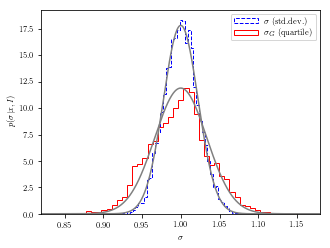

<Figure size 432x288 with 0 Axes>

In [5]:
%run ../code/fig_bootstrap_gaussian.py

### MLE applied to a Heteroscedastic Gaussian

Now let's look a case where the errors are heteroscedastic.  For example if we are measuring the length of a rod and have $N$ measurements, $\{x_i\}$, where the error for each measurement, $\sigma_i$ is known.  Since $\sigma$ is not a constant, then following the above, we have

$$\ln L = {\rm constant} - \sum_{i=1}^N \frac{(x_i - \mu)^2}{2\sigma_i^2}.$$

Taking the derivative:
$$\frac{d\;{\rm lnL}(\mu)}{d\mu}\Biggr\rvert_{\mu_0} = \sum_{i=1}^N \frac{(x_i - \mu_o)}{\sigma_i^2} = 0,$$
then simplifying:

$$\sum_{i=1}^N \frac{x_i}{\sigma_i^2} = \sum_{i=1}^N \frac{\mu_o}{\sigma_i^2},$$

yields a MLE solution of 
$$\mu_0 = \frac{\sum_i^N (x_i/\sigma_i^2)}{\sum_i^N (1/\sigma_i^2)},$$

with uncertainty
$$\sigma_{\mu} = \left( \sum_{i=1}^N \frac{1}{\sigma_i^2}\right)^{-1/2}.$$




### Truncated/Censored Data and Other Cost Functions

Note that dealing with missing data points ("censored data") adds complications that we don't have time to get into here, but see Ivezic 4.2.7  Also maximum likelihood is just one possible "cost function" (specifically the $L_2$ norm), see Ivezic, 4.2.8. 

## "Goodness" of Fit

The MLE approach tells us what the "best" model parameters are, but not how good the fit actually is.  If the model is wrong, "best" might not be particularly revealing!  For example, if you have $N$ points drawn from a linear distribution, you can always fit the data perfectly with an $N-1$ order polynomial.  But that won't necessarily perfectly predict future measurements.

We can describe the **goodness of fit** in words simply as whether or not it is likely to have obtained $\ln L_0$ by randomly drawing from the data.  That means that we need to know the *distribution* of $\ln L$.  

For the Gaussian case we have just described, we can write
$$z_i = (x_i-\mu)/\sigma,$$ then
$$\ln L = {\rm constant} - \frac{1}{2}\sum_{i=1}^N z^2 = {\rm constant} - \frac{1}{2}\chi^2.$$

Here, $\chi^2$ is the same thing that you may already be familar with and whose distribution we discussed last week.

So $\ln L$ is distributed as $\chi^2$ (with $N-k$ degrees of freedom).  

We define the $\chi^2$ per degree of freedom, $\chi^2_{dof}$, as
$$\chi^2_{dof} = \frac{1}{N-k}\sum_{i=1}^N z^2_i.$$

For a good fit, we would expect that $\chi^2_{dof}\approx 1$.  If $\chi^2_{dof}$ is significantly larger than 1, then it is likely that we are not using the correct model.

We can also get overly high or low values of $\chi^2_{dof}$ if our errors are under- or over-estimated as shown below:

![Ivezic, Figure 4.1](http://www.astroml.org/_images/fig_chi2_eval_1.png)


### Model Comparison

As noted above, we can always increase the number of paramters in our model and improve the fit.  So we need some kind of "scoring" system that accounts for the complexity of the model.

A common scoring system is the **Aikake information criterion (AIC)**.  For $N$ data points and a model with $k$ parameters,
$${\rm AIC} \equiv -2 \ln (L_0(M)) + 2k + \frac{2k(k+1)}{N-k-1},$$
where the 2nd and 3rd terms are designed to penalize complex models relative to simple ones.

Another scoring system is the **Bayesian information criterion (BIC)**, which is computed as
$${\rm BIC} \equiv -2 \ln (L_0(M)) + k \ln N.$$ 


We'll do more with this later (and for homework), but for now we'll leave off with an example showing an attempt to fit a complex 1-D distribution with multiple Gaussians (from Ivezic Figure 4.2). $\chi^2$ would keep falling with more components, but using the AIC or BIC we find that 3 Gaussians provides the best fit.

![Ivezic, Fkigure 4.2](http://www.astroml.org/_images/fig_GMM_1D_1.png)

### Other Important Things (that we are skipping over)

Other important things that we are skipping over right now include: 
* Confidence Estimates, particularly Bootstrap and Jackknife error estimates (Ivezic $\S$4.5)
* Hypothesis Testing (Ivezic $\S$4.6)
* A discussion of how to use MLE to derive the optimal histogram bin widths that we used in Lecture 2 (Ivezic $\S$4.8)
* Correcting for selection effects (Ivezic $\S$4.9)



## Bayesian Statistical Inference

Up to now in this lecture we have been computing the **likelihood** $p(D|M)$.  In Bayesian inference, we instead evaluate the **posterior probability** taking into account **prior** information.

Recall from the BasicStats lecture that Bayes' Rule is:
$$p(M|D) = \frac{p(D|M)p(M)}{p(D)},$$
where $D$ is for data and $M$ is for model.

We wrote this in words as:
$${\rm Posterior Probability} = \frac{{\rm Likelihood}\times{\rm Prior}}{{\rm Evidence}}.$$

If we explicitly recognize prior information, $I$, and the model parameters, $\theta$, then we can write:
$$p(M,\theta|D,I) = \frac{p(D|M,\theta,I)p(M,\theta|I)}{p(D|I)},$$
where we can omit the explict dependence on $\theta$ by writing $M$ instead of $M,\theta$ where appropriate.  

Note that it is often that case that $p(D|I)$ is not evaluated explictly since the likelihood can be normalized such that the "evidence" is unity.

The Bayesian Statistical Inference process is then
* formulate the likelihood, $p(D|M,\theta,I)$
* chose a prior, $p(M,\theta|I)$, which incorporates other information beyond the data in $D$
* determine the posterior pdf, $p(M,\theta|D,I)$
* search for the model paramters that maximize the posterior pdf
* quantify the uncertainty of the model parameter estimates
* test the hypothesis being addressed

## Bayesian Priors

Priors can be **informative** or **uninformative**.  As it sounds, informative priors are based on existing information that might be available.  Uninformative priors can be thought of as "default" priors, i.e., what your prior is if you weren't explicitly including a prior, e.g, a "flat" prior like $p(\theta|M,I) \propto {\rm C}$.

For the IQ test example, what kind of prior did we use?

In a *hierarchical Bayesian* analysis the priors themselves can have parameters and priors (hyperparameters and hyperpriors), but let's not worry about that for now.

While determining good priors is important for Bayesian analysis, I don't want to get distracted by it here.  You can read more about it in Ivezic, 5.2.  However, I'll briefly introduce 3 principles here.

#### The Principle of Indifference

Essentially this means adopting a uniform prior, though you have to be a bit careful.  Saying that an asteroid is equally likely to hit anywhere on the Earth is not the same as saying that all latitudes of impact are equally likely.  Assuming $1/6$ for a six-side die would be an example of indifference.

#### The Principle of Invariance (or Consistency)

This applies to location and scale invariance.  Location invariance suggests a uniform prior (within the accepted bounds).  Scale invariance gives us priors that look like $p(A|I) \propto 1/A$.

#### The Principle of Maximum Entropy

The principle of maximum entropy is discussed in Ivezic, 5.2.2.
It is often true that Bayesian analysis and traditional MLE are essentially equivalent.  However, in some cases, considering the priors can have significant consequences. 
See Ivezic $\S$5.5 for such an example.

## Analysis of a Heteroscedastic Gaussian distribution with Bayesian Priors

Consider the case of measuring a rod as above.  We want to know the posterior pdf for the length of the rod, $p(M,\theta|D,I) = p(\mu|\{x_i\},\{\sigma_i\},I)$.

For the likelihood we have
$$L = p(\{x_i\}|\mu,I) = \prod_{i=1}^N \frac{1}{\sigma_i\sqrt{2\pi}} \exp\left(\frac{-(x_i-\mu)^2}{2\sigma_i^2}\right).$$

In the Bayesian case, we also need a prior.  We'll adopt a uniform distribution given by
$$p(\mu|I) = C, \; {\rm for} \; \mu_{\rm min} < \mu < \mu_{\rm max},$$
where $C = \frac{1}{\mu_{\rm max} - \mu_{\rm min}}$ between the min and max and is $0$ otherwise.

The log of the posterior pdf is then
$$\ln L = {\rm constant} - \sum_{i=1}^N \frac{(x_i - \mu)^2}{2\sigma_i^2}.$$

This is exactly the same as we saw before, except that the value of the constant is different.  Since the constant doesn't come into play, we get the same result as before:
 
$$\mu^0 = \frac{\sum_i^N (x_i/\sigma_i^2)}{\sum_i^N (1/\sigma_i^2)},$$
with uncertainty
$$\sigma_{\mu} = \left( \sum_{i=1}^N \frac{1}{\sigma_i^2}\right)^{-1/2}.$$

We get the same result because we used a flat prior.  If the case were homoscedastic instead of heteroscedastic, we obviously would get the result from our first example.

Now let's consider the case where $\sigma$ is not known, but rather needs to be determined from the data.  In that case, the posterior pdf that we seek is not $p(\mu|\{x_i\},\{\sigma_i\},I)$, but rather $p(\mu,\sigma|\{x_i\},I)$.

As before we have
$$L = p(\{x_i\}|\mu,\sigma,I) = \prod_{i=1}^N \frac{1}{\sigma\sqrt{2\pi}} \exp\left(\frac{-(x_i-\mu)^2}{2\sigma^2}\right),$$
except that now $\sigma$ is uknown.

Our Bayesian prior is now 2D instead of 1D and we'll adopt 
$$p(\mu,\sigma|I) \propto \frac{1}{\sigma},\; {\rm for} \; \mu_{\rm min} < \mu < \mu_{\rm max} \; {\rm and} \; \sigma_{\rm min} < \sigma < \sigma_{\rm max}.$$

With proper normalization, we have
$$p(\{x_i\}|\mu,\sigma,I)p(\mu,\sigma|I) = C\frac{1}{\sigma^{(N+1)}}\prod_{i=1}^N \exp\left( \frac{-(x_i-\mu)^2}{2\sigma^2}  \right),$$
where
$$C = (2\pi)^{-N/2}(\mu_{\rm max}-\mu_{\rm min})^{-1} \left[\ln \left( \frac{\sigma_{\rm max}}{\sigma_{\rm min}}\right) \right]^{-1}.$$



The log of the posterior pdf is

$$\ln[p(\mu,\sigma|\{x_i\},I)] = {\rm constant} - (N+1)\ln\sigma - \sum_{i=1}^N \frac{(x_i - \mu)^2}{2\sigma^2}.$$

Right now that has $x_i$ in it, which isn't that helpful, but since we are assuming a Gaussian distribution, we can take advantage of the fact that the mean, $\overline{x}$, and the variance, $V (=s^2)$, completely characterize the distribution.  So we can write this expression in terms of those variables instead of $x_i$.  Skipping over the math details (see Ivezic $\S$5.6.1), we find

$$\ln[p(\mu,\sigma|\{x_i\},I)] = {\rm constant} - (N+1)\ln\sigma - \frac{N}{2\sigma^2}\left( (\overline{x}-\mu)^2 + V  \right).$$

Note that this expression only contains the 2 parameters that we are trying to determine: $(\mu,\sigma)$ and 3 values that we can determine directly from the data: $(N,\overline{x},V)$.

Load and execute the next cell to visualize the posterior pdf for the case of $(N,\overline{x},V)=(10,1,4)$.  Change `usetex=True` to `usetex=False` if you have trouble with the plotting.  Try changing the values of $(N,\overline{x},V)$.

Text(0, 0.5, '$\\sigma$')

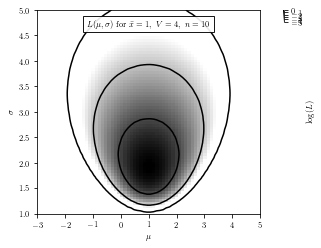

In [2]:
# %load code/fig_likelihood_gaussian.py
"""
Log-likelihood for Gaussian Distribution
----------------------------------------
Figure5.4
An illustration of the logarithm of the posterior probability density
function for :math:`\mu` and :math:`\sigma`, :math:`L_p(\mu,\sigma)`
(see eq. 5.58) for data drawn from a Gaussian distribution and N = 10, x = 1,
and V = 4. The maximum of :math:`L_p` is renormalized to 0, and color coded as
shown in the legend. The maximum value of :math:`L_p` is at :math:`\mu_0 = 1.0`
and :math:`\sigma_0 = 1.8`. The contours enclose the regions that contain
0.683, 0.955, and 0.997 of the cumulative (integrated) posterior probability.
"""
# Author: Jake VanderPlas
# License: BSD
#   The figure produced by this code is published in the textbook
#   "Statistics, Data Mining, and Machine Learning in Astronomy" (2013)
#   For more information, see http://astroML.github.com
#   To report a bug or issue, use the following forum:
#    https://groups.google.com/forum/#!forum/astroml-general
import numpy as np
from matplotlib import pyplot as plt
from astroML.plotting.mcmc import convert_to_stdev

#----------------------------------------------------------------------
# This function adjusts matplotlib settings for a uniform feel in the textbook.
# Note that with usetex=True, fonts are rendered with LaTeX.  This may
# result in an error if LaTeX is not installed on your system.  In that case,
# you can set usetex to False.
from astroML.plotting import setup_text_plots
setup_text_plots(fontsize=8, usetex=True)


def gauss_logL(xbar, V, n, sigma, mu):
    """Equation 5.57: gaussian likelihood"""
    return (-(n + 1) * np.log(sigma)
            - 0.5 * n * ((xbar - mu) ** 2 + V) / sigma ** 2)

#------------------------------------------------------------
# Define the grid and compute logL
sigma = np.linspace(1, 5, 70)
mu = np.linspace(-3, 5, 70)
xbar = 1
V = 4
n = 10

logL = gauss_logL(xbar, V, n, sigma[:, np.newaxis], mu)
logL -= logL.max()

#------------------------------------------------------------
# Plot the results
fig = plt.figure(figsize=(5, 3.75))
plt.imshow(logL, origin='lower',
           extent=(mu[0], mu[-1], sigma[0], sigma[-1]),
           cmap=plt.cm.binary,
           aspect='auto')
plt.colorbar().set_label(r'$\log(L)$')
plt.clim(-5, 0)

plt.contour(mu, sigma, convert_to_stdev(logL),
            levels=(0.683, 0.955, 0.997),
            colors='k')

plt.text(0.5, 0.93, r'$L(\mu,\sigma)\ \mathrm{for}\ \bar{x}=1,\ V=4,\ n=10$',
         bbox=dict(ec='k', fc='w', alpha=0.9),
         ha='center', va='center', transform=plt.gca().transAxes)
plt.xlabel(r'$\mu$')
plt.ylabel(r'$\sigma$')

The shaded region is the posterior probability.  The contours are the confidence intervals.  We can compute those by determining the marginal distribution at each $(\mu,\sigma)$.  The top panels of the figures below show those marginal distributions.  The solid line is what we just computed.  The dotted line is what we would have gotten for a uniform prior--not that much difference.  The dashed line is the MLE result, which is quite different.  The bottom panels show the cumulative distribution.

![Ivezic, Figure 5.5](http://www.astroml.org/_images/fig_posterior_gaussian_1.png)


Note that the marginal pdfs follow a Student's $t$ Distribution, which becomes Gaussian for large $N$.

### Recap

To review: the Bayesian Statistical Inference process is
* formulate the likelihood, $p(D|M,\theta,I)$
* chose a prior, $p(M,\theta|I)$, which incorporates other information beyond the data in $D$
* determine the posterior pdf, $p(M,\theta|D,I)$
* search for the model paramters that maximize the posterior pdf
* quantify the uncertainty of the model parameter estimates
* test the hypothesis being addressed

The last part we haven't talked about yet.

What if we wanted to model the mixture of a Gauassian distribution with a uniform distribution.  When might that be useful?  Well, for example:

![Atlas Higgs Boson Example](http://www.atlasexperiment.org/photos/atlas_photos/selected-photos/plots/fig_02.png)

Obviously this isn't exactly a Gaussian and a uniform distribution, but a line feature superimposed upon a background is the sort of thing that a physicist might see and is pretty close to this case for a local region around the feature of interest.  This is the example discussed in Ivezic $\S$5.6.5.

For this example, we will assume that the location parameter, $\mu$, is known (say from theory) and that the errors in $x_i$ are negligible compared to $\sigma$.

The likelihood of obtaining a measurement, $x_i$, in this example can be written as
$$L = p(x_i|A,\mu,\sigma,I) = \frac{A}{\sigma\sqrt{2\pi}} \exp\left(\frac{-(x_i-\mu)^2}{2\sigma^2}\right) + \frac{1-A}{W}.$$

Here the background probability is taken to be $0 < x < W$ and 0 otherwise.  The feature of interest lies between $0$ and $W$.  $A$ and $1-A$ are the relative strengths of the two components, which are obviously anti-correlated.  Note that there will be covariance between $A$ and $\sigma$.  

If we adopt a uniform prior in both $A$ and $\sigma$:
$$p(A,\sigma|I) = C, \; {\rm for} \; 0\le A<A_{\rm max} \; {\rm and} \; 0 \le \sigma \le \sigma_{\rm max},$$
then the posterior pdf is given by
$$\ln [p(A,\sigma|\{x_i\},\mu,W)] = \sum_{i=1}^N \ln \left[\frac{A}{\sigma \sqrt{2\pi}} \exp\left( \frac{-(x_i-\mu)^2}{2\sigma^2} \right)  + \frac{1-A}{W} \right].$$

The figure below (Ivezic, 5.13) shows an example for $N=200, A=0.5, \sigma=1, \mu=5, W=10$.  Specifically, the bottom panel is a result drawn from this distribution and the top panel is the likelihood distribution derived from the data in the bottom panel.
![Ivezic, Figure 5.13](http://www.astroml.org/_images/fig_likelihood_gausslin_1.png)

A more realistic example might be one where all three parameters are unknown: the location, the width, and the background level.  But that will have to wait until $\S$5.8.6.

In the meantime, note that we have not binned the data, $\{x_i\}$.  We only binned Figure 5.13 for the sake of visualizaiton.  However, sometimes the data are inherently binned (e.g., the detector is pixelated).  In that case, the data would be in the form of $(x_i,y_i)$, where $y_i$ is the number of counts at each location.  We'll skip over this example, but you can read about it in Ivezic $\S$5.6.6.  A refresher on the Poission distribution (Ivezic $\S$3.3.4) might be appropriate first.

### Model Selection (5.7.1)

### Bayesian Determination of Histogram Bin Size (5.7.2)

## Hypothesis Testing:

Section 4.6

If we want to know whether $x_i$ or even the full sample $\{x_i\}$ is drawn from a Gaussian distribution ...

p-values.

[538 article](http://fivethirtyeight.com/features/science-isnt-broken/#part1)
